# Homework 3 - Duc Trinh 

In [1]:
import pandas as pd

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import numpy as np

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [5]:
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

## Exercise 1 

### a) 

In [7]:
redWine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter = ";")

In [8]:
redWine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
numeric_data = redWine.values

In [10]:
numeric_data

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [11]:
numeric_data.shape

(1599, 12)

In [12]:
wine_labels = np.zeros(len(numeric_data))
for i in range(len(numeric_data)):
    if (numeric_data[i][11] >= 7):
        wine_labels[i] = 1
    else:
        wine_labels[i] = 0
wine_labels

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
wine_attrs = np.delete(numeric_data, 11, 1)
wine_attrs

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

### b)

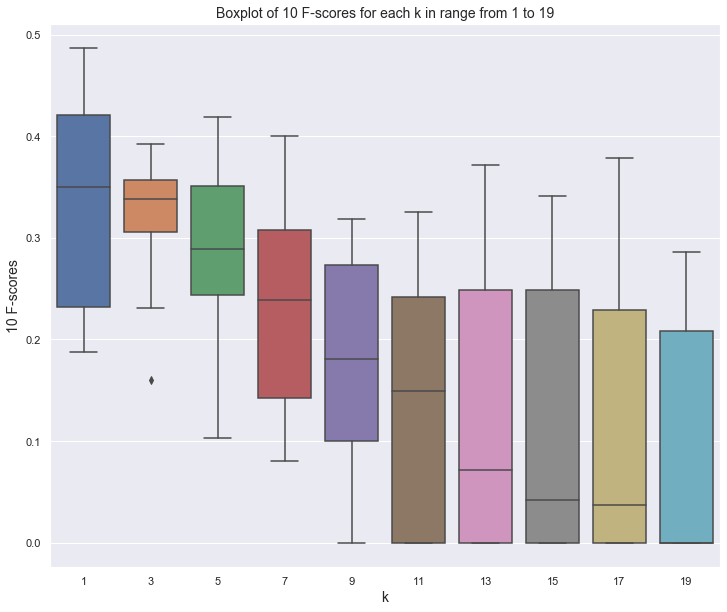

In [14]:
plt.figure(figsize = (12, 10))
plt.title(label = "Boxplot of 10 F-scores for each k in range from 1 to 19", fontsize = 14)
plt.xlabel(xlabel = "k", fontsize = 14)
plt.ylabel(ylabel = "10 F-scores", fontsize = 14)
_ = sns.boxplot(x=list(range (1, 21, 2)), y=[cross_val_score(KNeighborsClassifier(n_neighbors=k,metric="euclidean"), X = wine_attrs, y = wine_labels, cv=10, scoring = 'f1') for k in range (1, 21,2)])

Based on the boxplots, it seems like I should choose k=  1 since it produces the best boxplot of F1-scores (highest max among other k as well as a pretty small range). However, I think k = 1 produces the best F1-scores solely due to it being too sensitive to noises. I would choose k = 3 as it has similar median for its F1-scores as the ones produced by k = 1 while having smaller range and probably less bias.

### c)

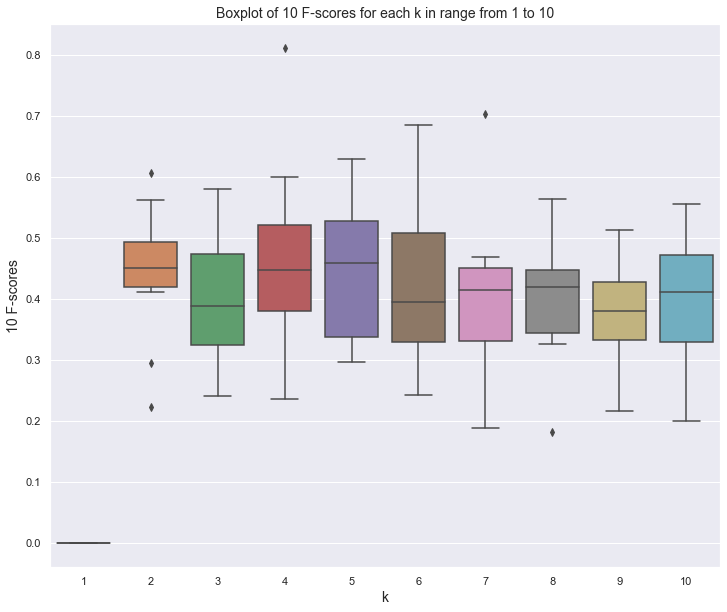

In [15]:
plt.figure(figsize = (12, 10))
plt.title(label = "Boxplot of 10 F-scores for each k in range from 1 to 10", fontsize = 14)
plt.xlabel(xlabel = "k", fontsize = 14)
plt.ylabel(ylabel = "10 F-scores", fontsize = 14)
_ = sns.boxplot(x=list(range (1, 11, 1)), y=[cross_val_score(DecisionTreeClassifier(max_depth = k), X = wine_attrs, y = wine_labels, cv=10, scoring = 'f1') for k in range (1, 11,1)])

I would choose k = 5 since it seems like its classifier produces the best F1-scores (the max of this boxplot is very high as well as high median). For k > 5, the F1-scores seems to be decreasing (their medians are lower and the boxplots shift down). For k < 5, the F1-scores seems to be increasing (their medians are higher and the boxplots shift up). This gives me reason to believe k = 5 gives the classifier the best F1-scores as it seems like this is the break-off point.

## Exercise 2

The objective of the project is to detect the students who have high potential to suffer academically and to drop out, which will allow us to take precautionary actions to improve the chance that these students will graduate successfully. If we can implement this project successfully, it will certainly benefit these students. Furthermore, if every student does well academically and is not at risk of dropping out, it will generate a better studying environment within the college. In the long run, the project can potentially increase the reputation of the college. 

To do this project, we will make use of personal data from the first-year students as well as personal data from the previous groups of students who have entered this college. The features can include but not limited to race, age, sex, address, high school results (GPA will be the main indicator here), standardized testing results, whether they are first-gen in college or not, financial status (whether they are on financial aid or not, the amount of aid they are receiving). These are all data that the college should have on hand as these data are common data collected in college admission. Assuming that no students lied on their college application, we could consider the data we have high quality data. The only issue would probably be missing features from the data collected a long time ago (the college might not have asked about students’ age 5 years ago for example). If we need more data, we could potentially identify other colleges similar to our college to get access to their data. To decide which colleges are similar to our college, we could take into consideration location, demographic, size, college ranking. However, I do not think it would be likely that other colleges would be allowed to share this kind of data with another college for privacy reasons.

After collecting the data, we will need to perform some data cleaning on the data we have including: fixing the problem of missing data, transforming features, and trying to drop irrelevant features. My main concern with the data we have are missing data fields from previous years. We can potentially drop these years if they are too far back and we have enough data. We can also keep them depends on whether the missing fields are relevant attributes or not. We can decide whether the features are relevant or not based on some visualization or checking the correlations between each feature with another and with our target variable. Then, we can drop the features that do not have high correlation with our target variable (irrelevant) or the features that have high correlation with each other (redundant, i.e. high school GPA and standardized testing result are positively correlated and we could potentially drop one of them). Finally, we want to perform some transformations on our features. Address could be transformed into categorical based on some kind of classification (i.e., urban, suburban, countryside) which could be transformed into binary using one-hot encoding. All other categorial variables can also be transformed into binary variables using the same method. The amount of aid the student is receiving should be made into percent in regard to the specific year’s tuition. Furthermore, high school GPA can be on different scale (international students might come in with a GPA that is calculated on a different scale than domestic students’), so it needs to be standardized.  Similarly, standardized testing scores need to be normalized due to many different forms of available standardized tests (SAT and ACT are common ones in the U.S. and SAT is scored out of 2400 while ACT is scored out of 36). 

After we got our data, we need to decide on the model we are using for the project. The problem is a binary classification problem. It will be a supervised learning task due to the fact that the label of the data is known as we knew whether the students of previous years dropped out or not. The problem is a classification task because the goal is to predict a discrete value for each incoming student based on their profile. Specifically, we are predicting whether that student will drop out or not so there are two possible values for our label making it a binary classification task. All of the approaches we have discussed so far in class could be applied here (kNN, decision tree, linear regression). We should do a k-fold cross validation to choose the best performing model. 

Out of these models, we will choose the model that performs the best in our indicators. Assuming that our label is 1 or positive if a student is predicted to drop out and 0 otherwise. Then, the main indicator we want to look at is Recall since we want to avoid type I error with this kind of project. In other words, we do not mind classifying more students as potential dropouts as we are more worried about not catching the potential dropouts. We can also use F1-score as the indicator if we want a balance between Recall and Precision here.

After we have chosen and trained our model, we need to decide what we want to do with the result. We could design a support system for the students being classified as potential dropouts. We could ask the teachers to pay more attention to these students in class. We should also tailor the support systems for each student and try to figure out why each specific case was classified as a potential dropout and solve the problem that way. For example, if a student was classified as a potential dropout due to financial reason, we could provide more aids for that student. All of this should be done in a way that the students do not notice the supportive system. Otherwise, students could feel like there is unfair treatment in the school. 

I do think we have met all the requirements for a successful data science project here. We as students have some domain knowledge in the matter as we ourselves have a good sense of what will allow a student to success in college, and what the stories of dropout students usually look like. That being said, we also need to contact education experts as they have done concrete research on topic like this for many years. I think we do have good enough data to do the project. We should have enough observations in our data as thousands of students go in a college each year. Also, as I have mentioned, if we actually lack data to perform the project, we could reach out to other similar colleges to ask for their collaboration in a joint-project. I think I have listed a decent number of relevant features that could be extracted from the students’ college applications for the project. The data we have should be clean after our data processing steps given that the students did not lie on their applications. Even if there are students who did lie on their applications, I presume that the percent would not be high enough to significantly affect the data analysis. The data would not be unbiased as we would be using all the data from freshman-year students in the college. In other words, we are using the population itself. We do have the capacity to act as our action plan are all things that could be carried out by the college. We have a clear measurement for Return of Investment as we would just need to wait for the group of freshman-year college students to go through college to see whether we have succeeded in increasing the graduation rates as well as the academic results of the students who we identified as potential dropouts. 

Some ethical questions raised in this project are whether we could use students’ personal data this way and whether it is fair for other students that we provide extra help for only a group of students. For the first issue, I think it is ethical to use the students’ data this way since it is an institution’s duty and responsible to help their students to success. We should still include some kind of clause in the college application form to ask for the students’ permission to use their data though. On the second issue, I think we could avoid if by making sure all students could access all the resources and extra help that we are giving to the students we determined as potential dropouts. Hence, the help would be there for all the students who think they need it. A good utilization would be the personalized help system that I have mentioned. Another good way to use the result could be to trying to fix the students’ problem on a bigger scale. For example, if we are seeing all the students from one specific neighborhood showing high potential of dropping out, we could work with the local government to examine the neighborhood itself outside of helping the students from that neighborhood. A bad utilization would be to tell the students the results of the project as it will not help them in any shape or form. The students who are predicted to drop out might just drop out. The students who are predicted to do well academically might get too confident and might ignore their studies. Another bad way to use the result would be to purposefully ignore the students who are potential drop outs. For example, a school can potentially ignore a student asking for extra help due to the fact that they think the student will likely drop out anyway and is not worth the investment. I think this is just unethical if a school do this, but it could definitely happen. For example, colored students in the U.S. are sometimes ignored in schools due to the fact that teachers seeing them as not as academically capable as their peers. 
